### 0. Install Dependencies

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo


Cloning into 'yolov5'...
remote: Enumerating objects: 12487, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 12487 (delta 23), reused 26 (delta 14), pack-reused 12446
Receiving objects: 100% (12487/12487), 12.45 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (8555/8555), done.


In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.0+cu113 (Tesla T4)


In [ ]:
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

/content/yolov5
     |████████████████████████████████| 596 kB 32.8 MB/s 
     |████████████████████████████████| 21.6 MB 93.0 MB/s 
     |████████████████████████████████| 54 kB 1.2 MB/s 
     |████████████████████████████████| 145 kB 77.6 MB/s 
     |████████████████████████████████| 4.3 MB 57.8 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 178 kB 77.5 MB/s 
     |████████████████████████████████| 138 kB 75.6 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 


### 1. Load Custom dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="fkGLXDbaDekHbCOt6y7y")
project = rf.workspace("5-jcfgi").project("eai-sdcs9")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/EAI-2 in yolov5pytorch:: 100%|██████████| 2690/2690 [00:01<00:00, 1459.23it/s]


### 2. Train Custom Yolov5 Model

Here, we are able to pass a number of arguments:

- img: define input image size
- batch: determine batch size
- epochs: define the number of training epochs. (Note: often, 3000+ are common here!)
- data: Our dataset locaiton is saved in the dataset.location
- weights: specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- cache: cache images for faster training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/EAI-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-362-g731a2f8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

### 3. Evaluate Custom Yolov5 Detector Perfomance

### 4. Run Inference with Trained Weights

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/EAI-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-362-g731a2f8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/136 /content/datasets/EAI-2/test/images/0004_jpg.rf.2e53d387e1611254f5e3b64953dcf9fc.jpg: 416x416 1 drone, Done. (0.009s)
image 2/136 /content/datasets/EAI-2/test/images/0010_jpg.rf.f1764e85b3e9328e4bdc11c22289ae7b.jpg: 416x416 3 drones, Done. (0.008s)
image 3/136 /content/datasets/EAI-2/test/images/0015_jpg.rf.3343f8704afb34ea5864c276

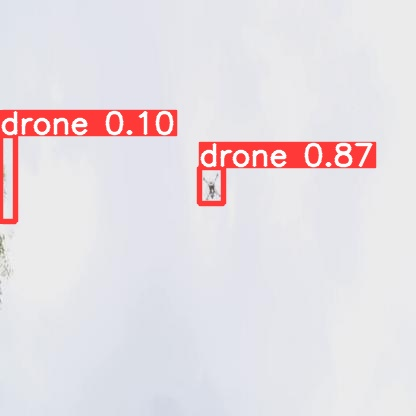

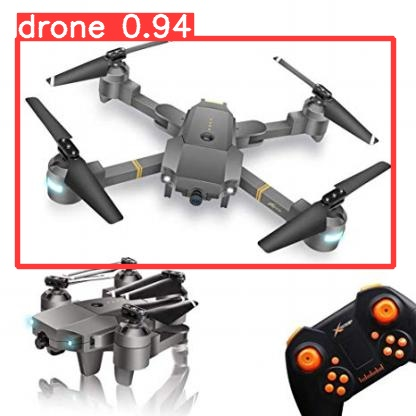

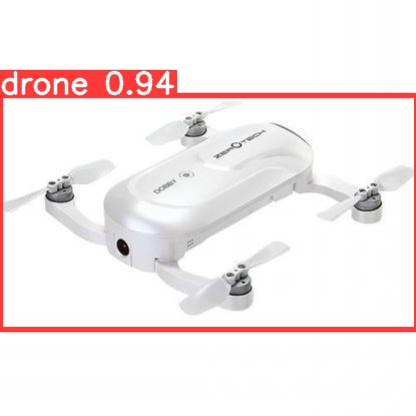

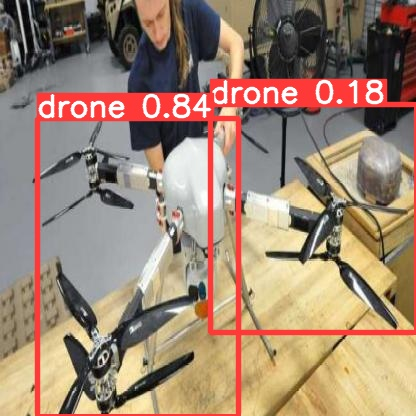

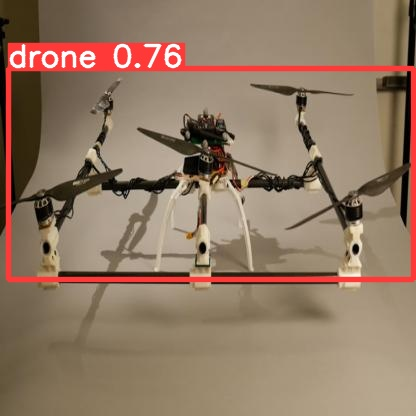

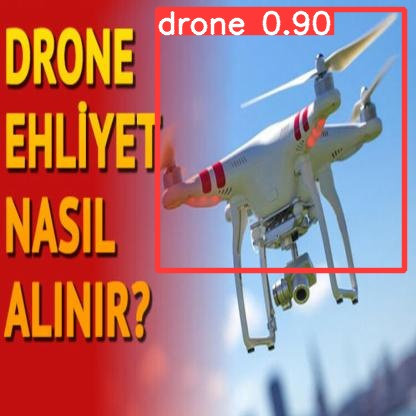

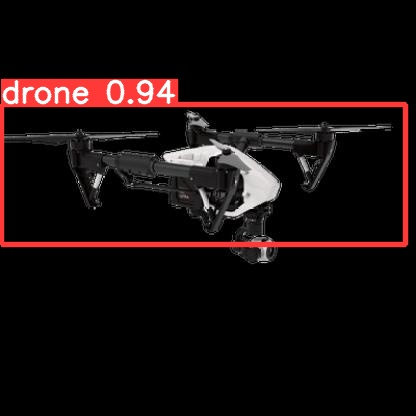

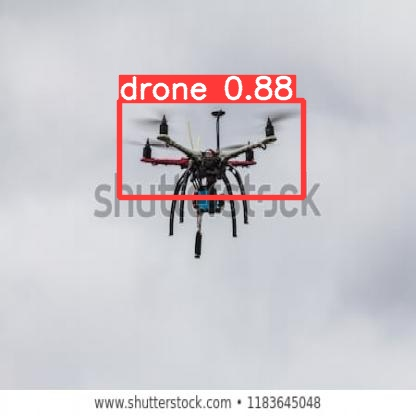

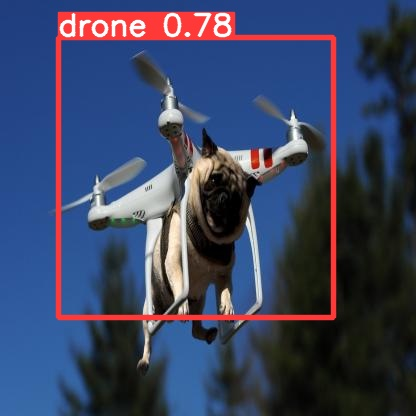

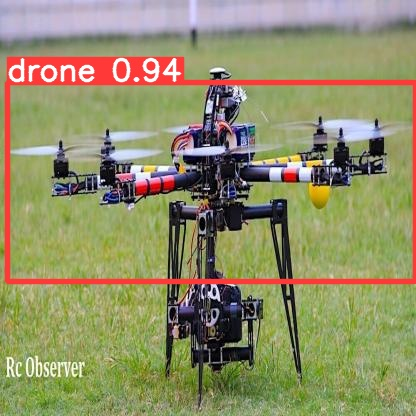

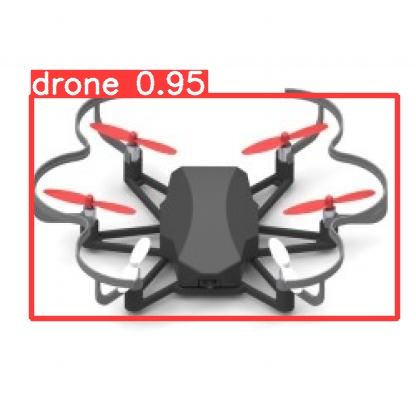

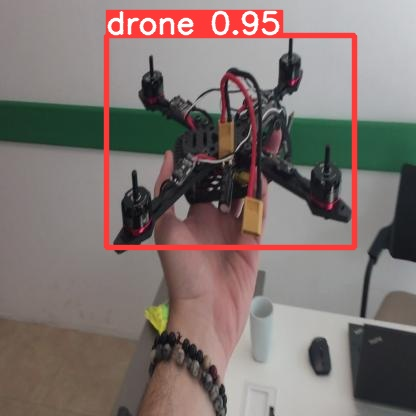

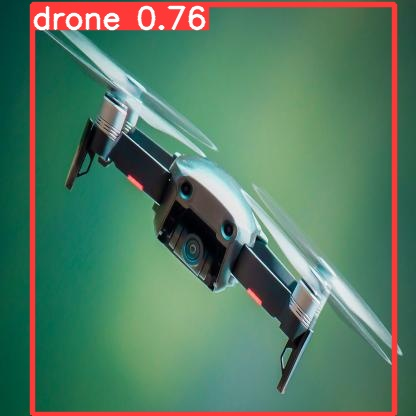

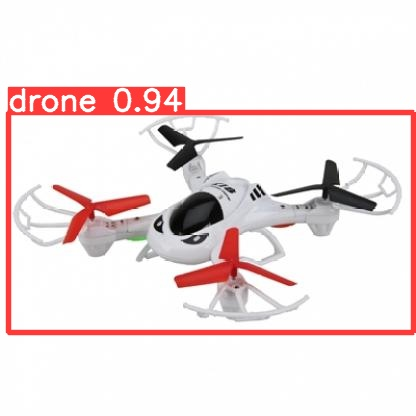

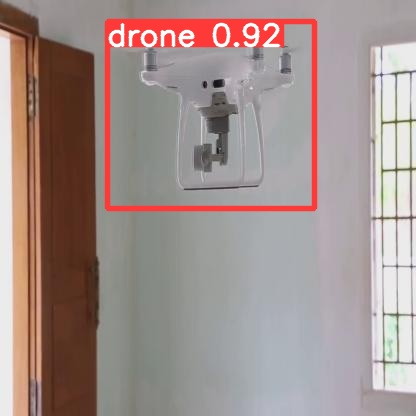

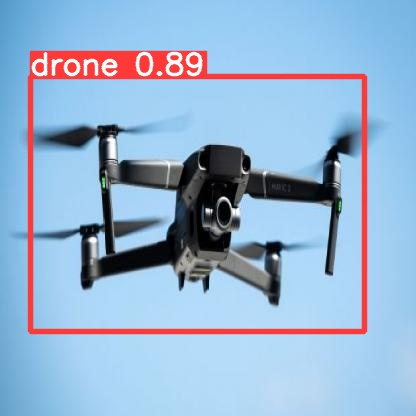

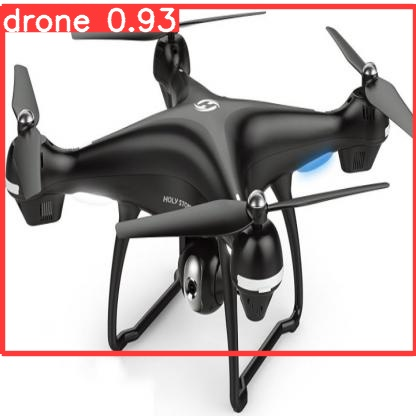

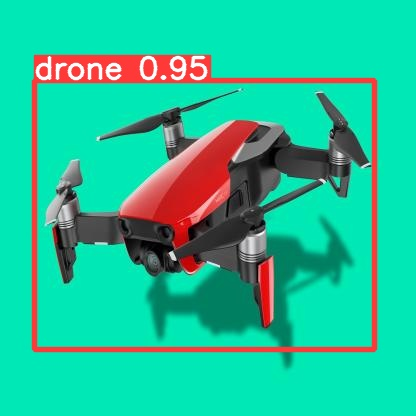

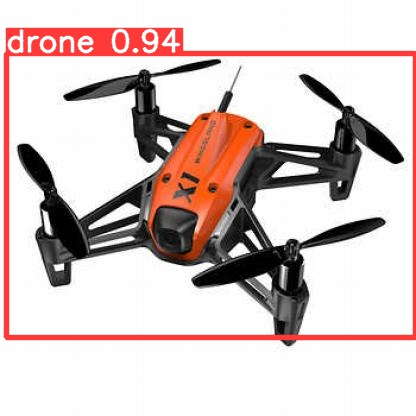

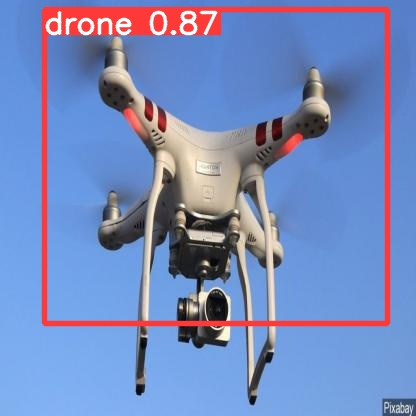

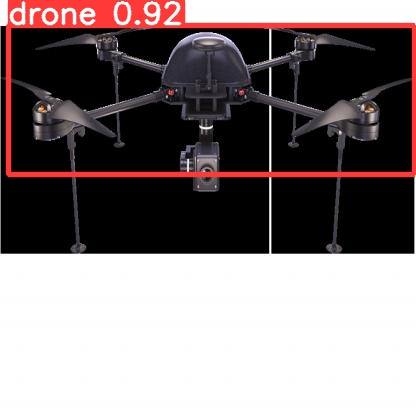

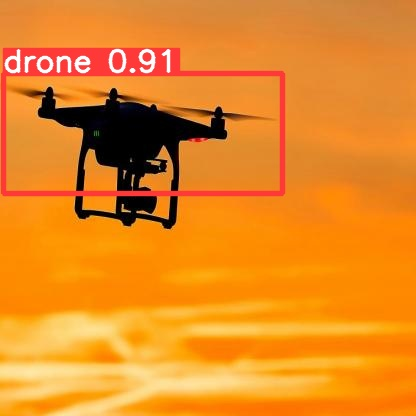

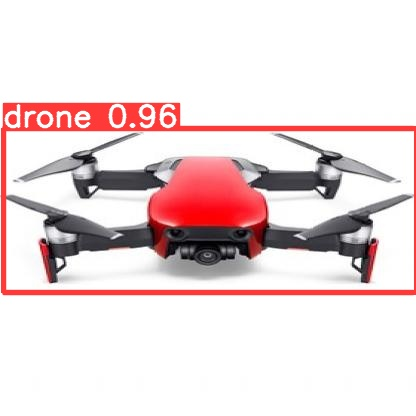

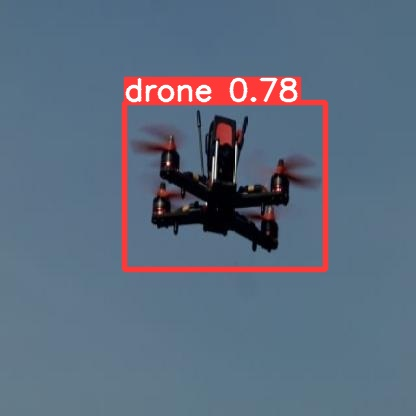

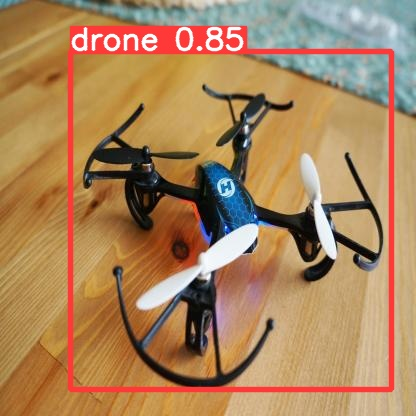

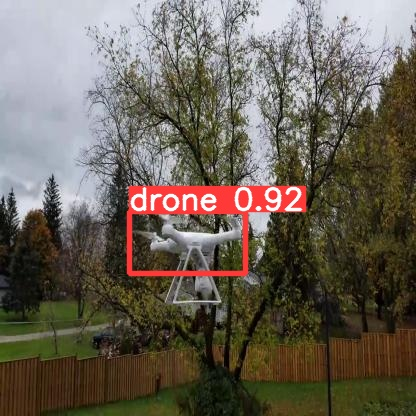

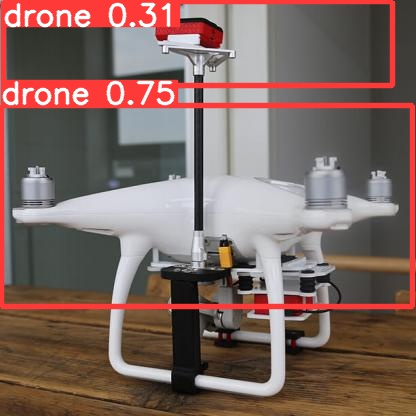

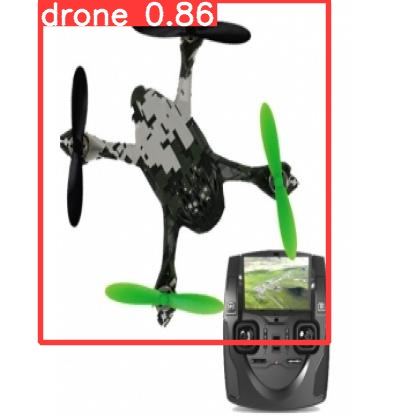

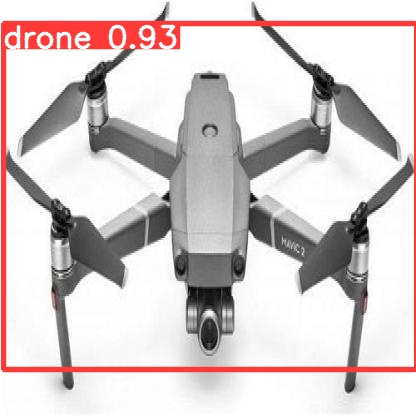

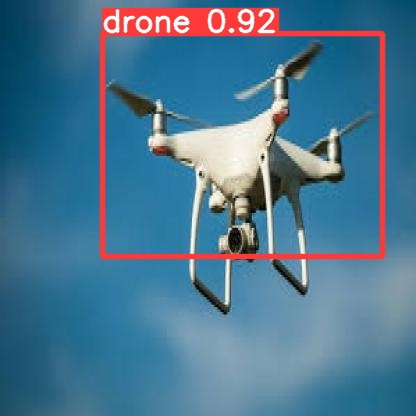

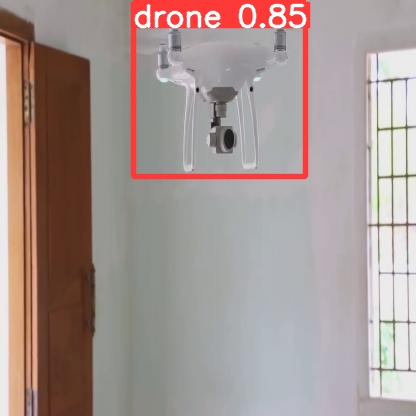

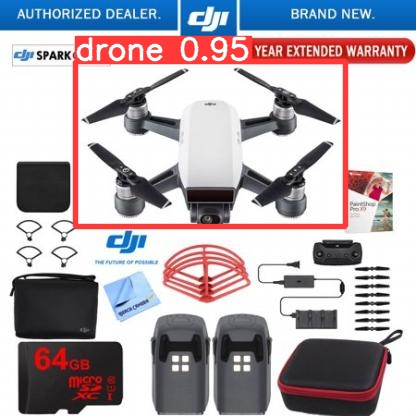

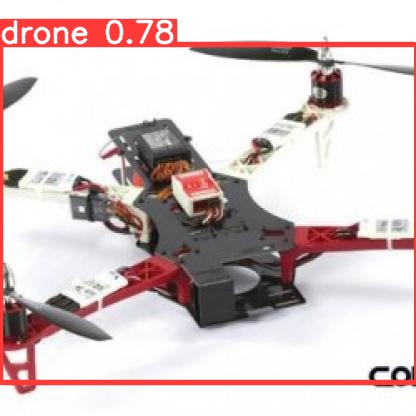

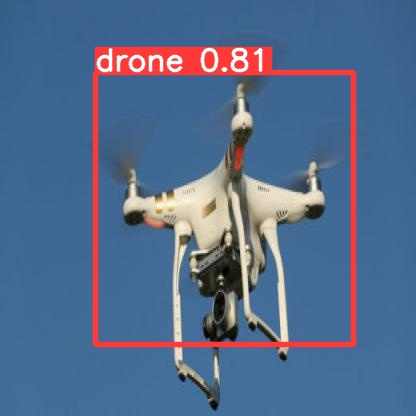

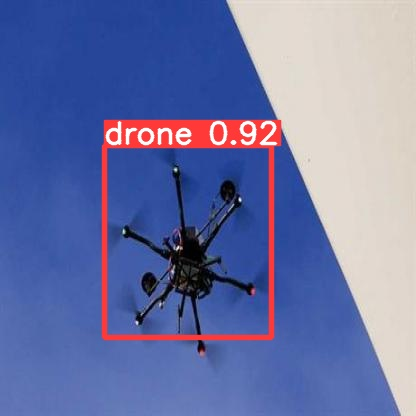

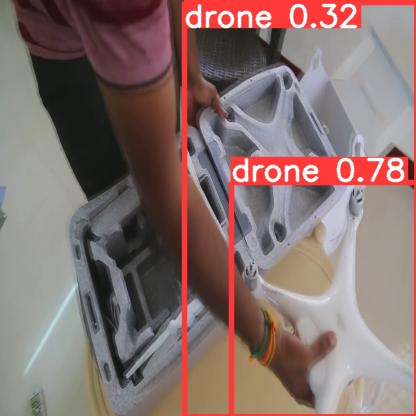

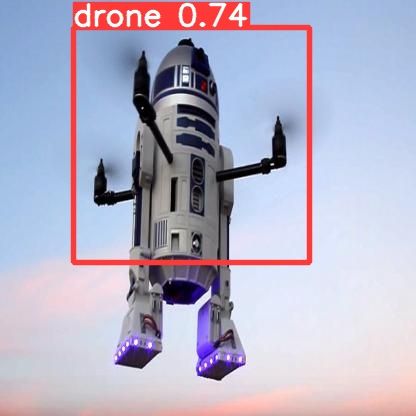

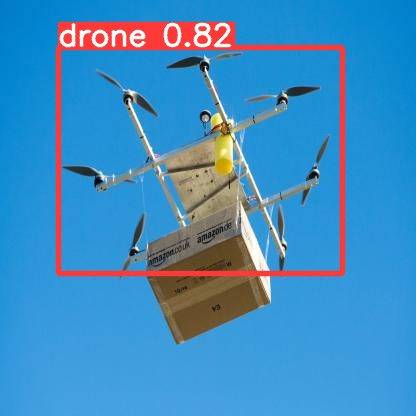

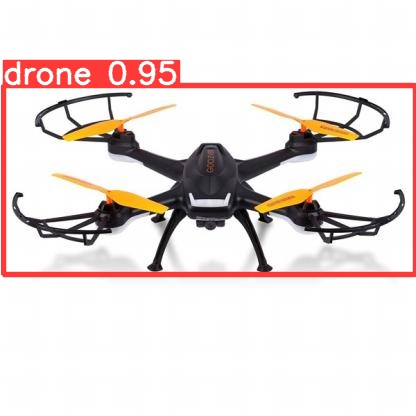

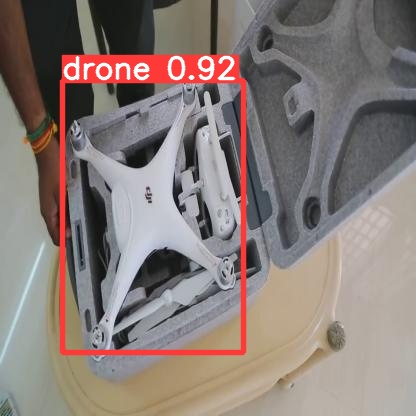

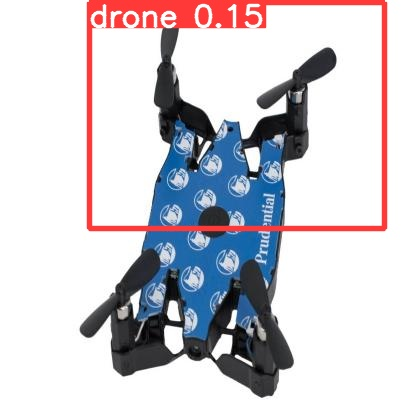

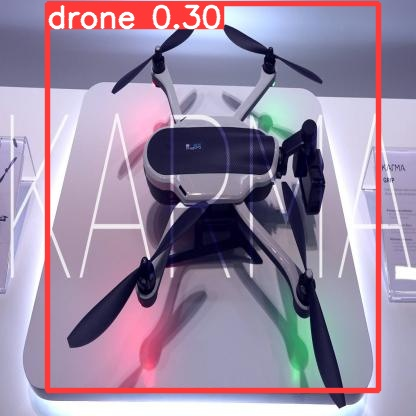

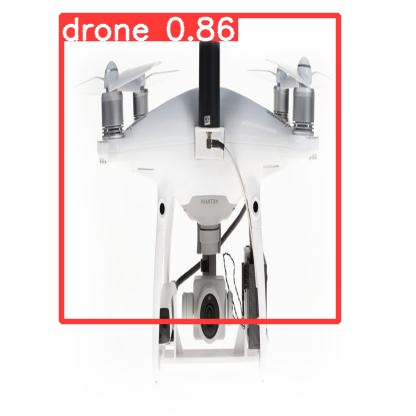

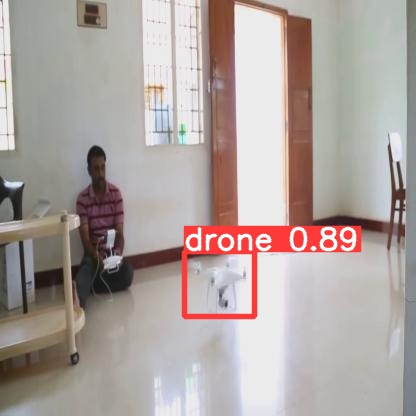

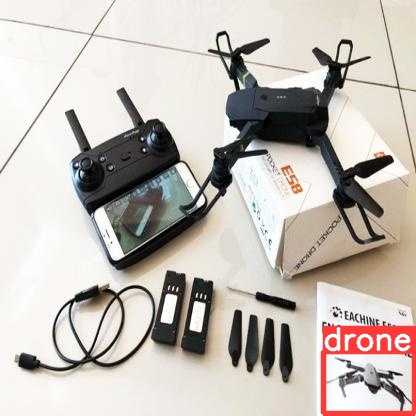

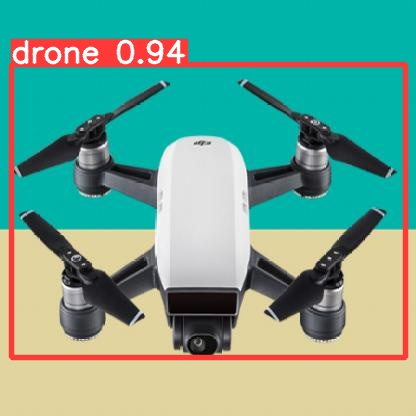

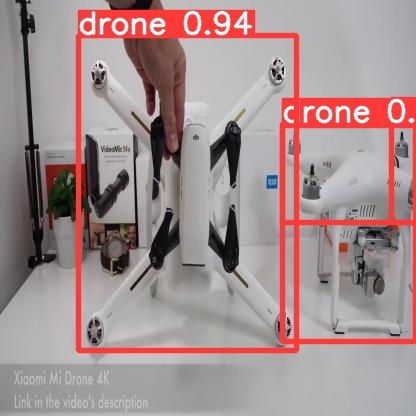

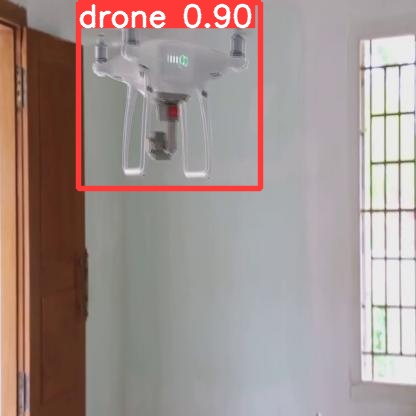

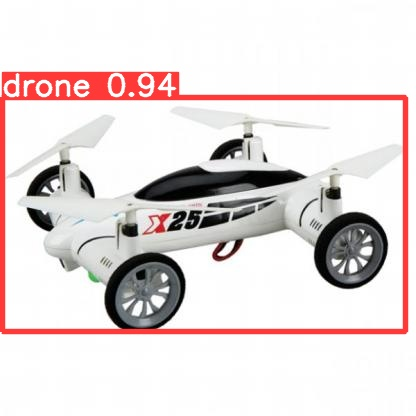

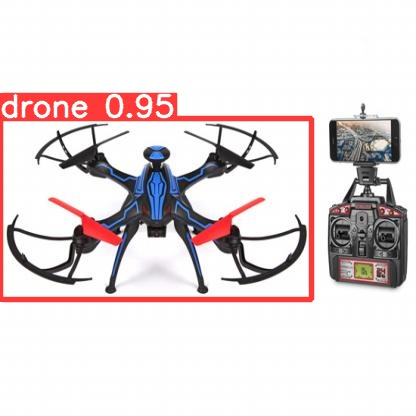

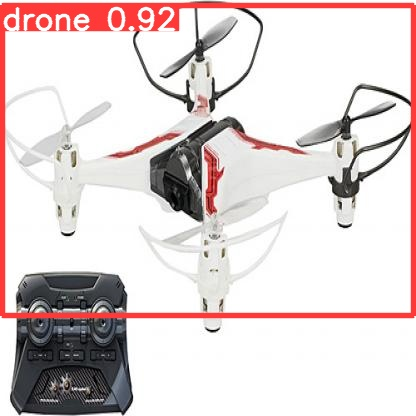

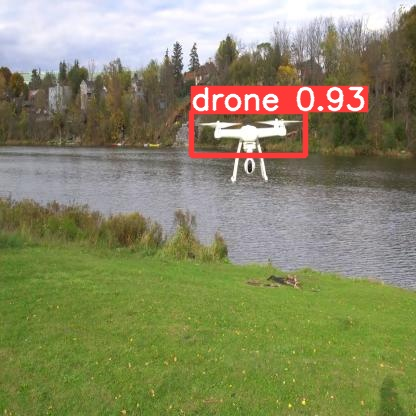

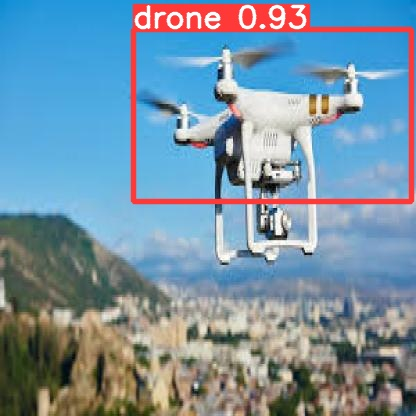

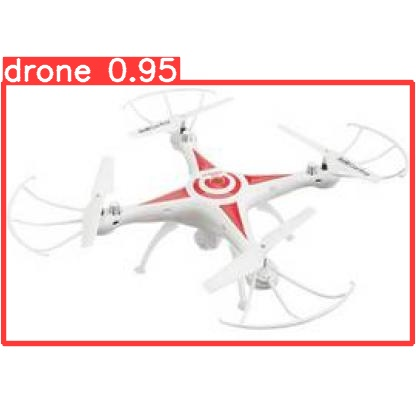

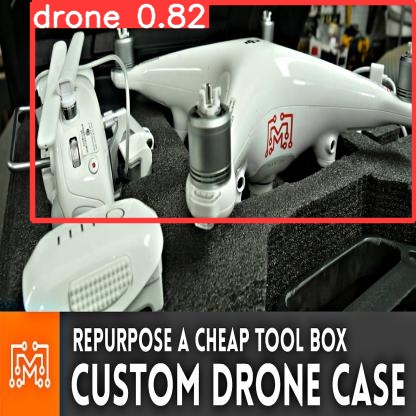

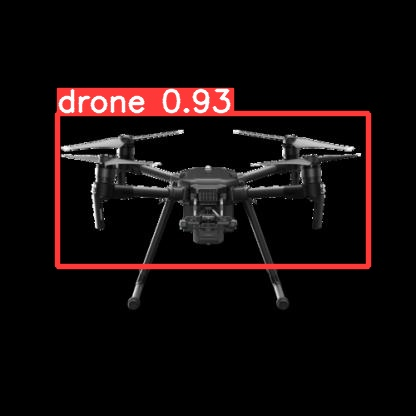

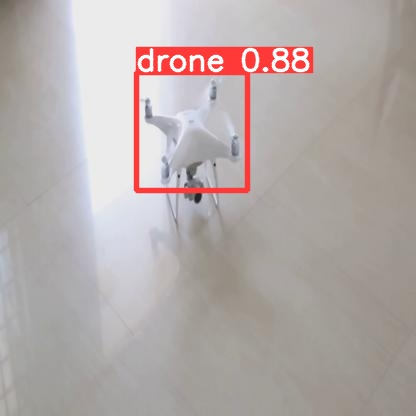

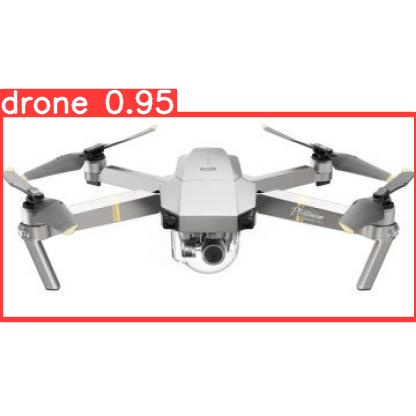

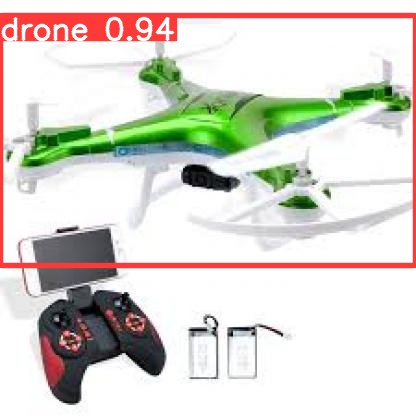

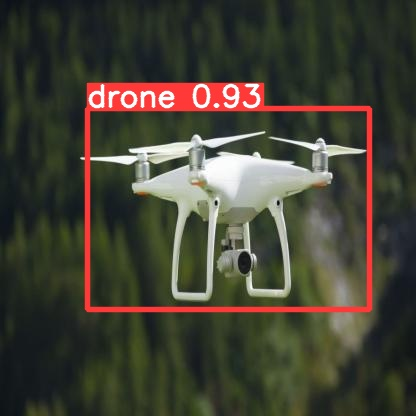

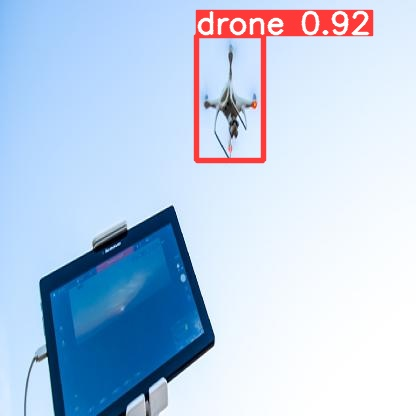

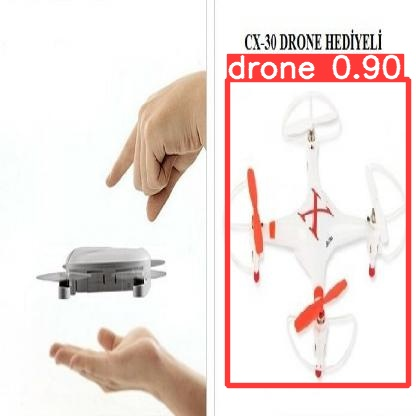

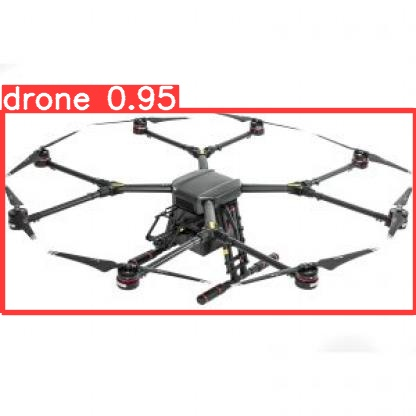

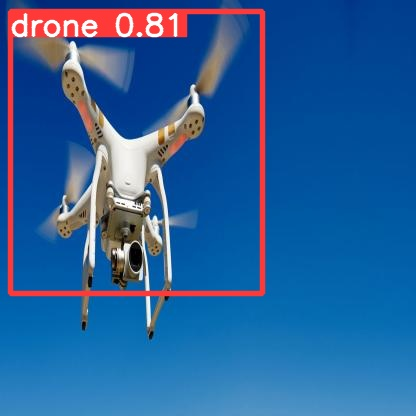

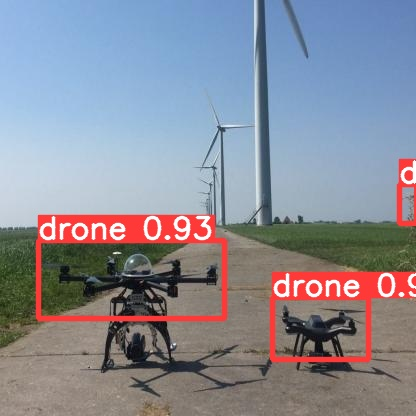

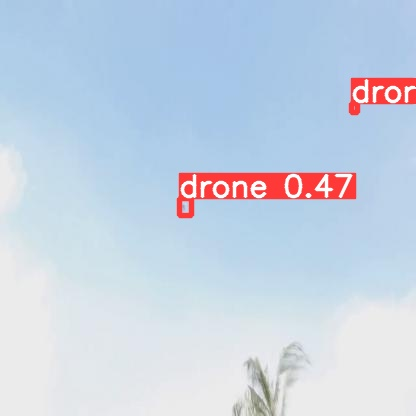

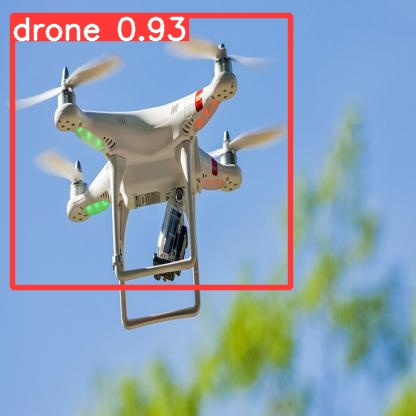

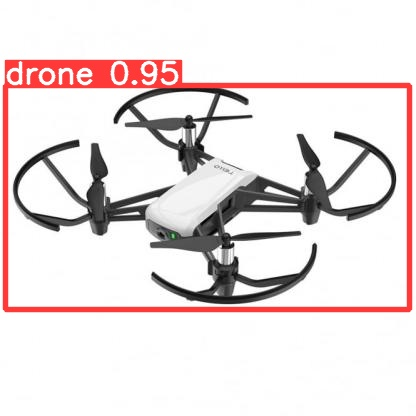

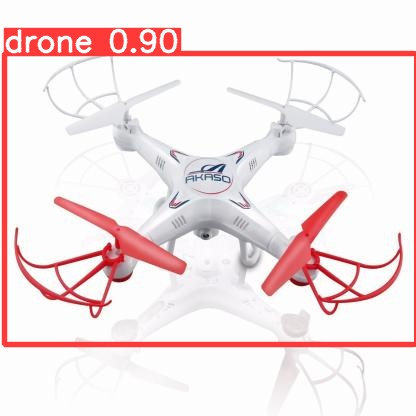

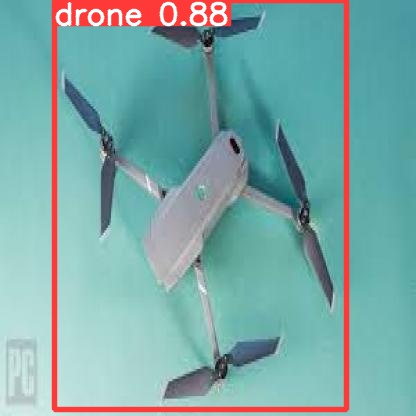

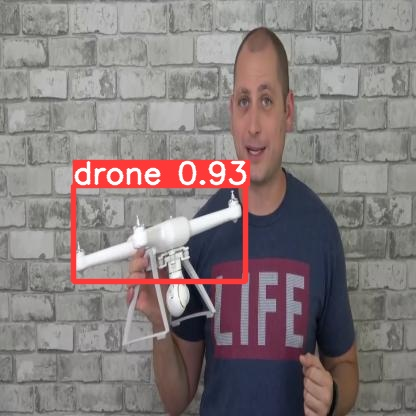

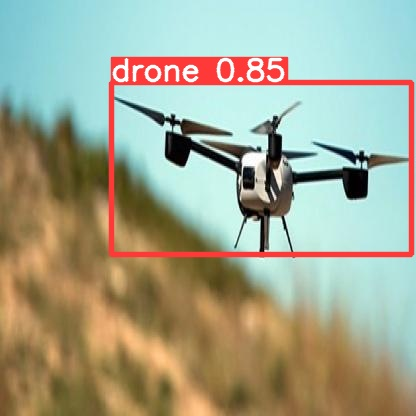

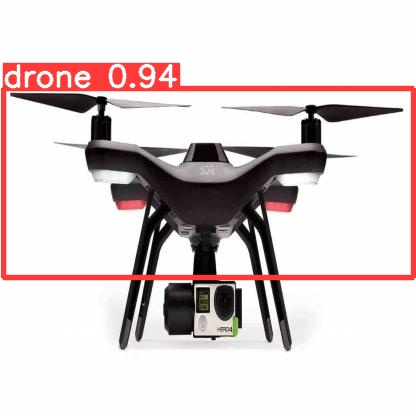

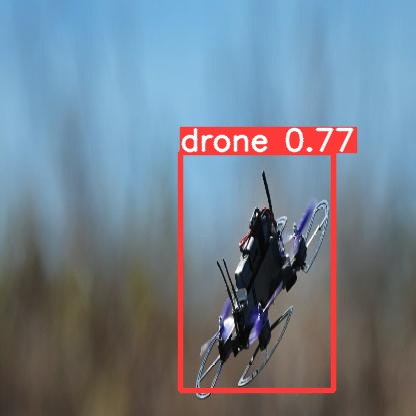

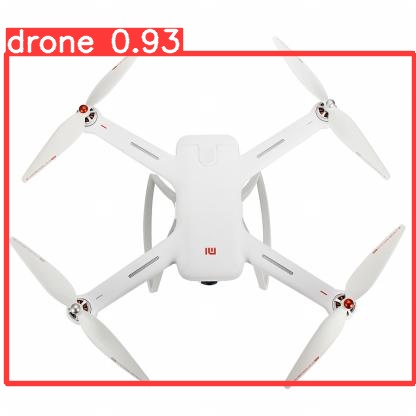

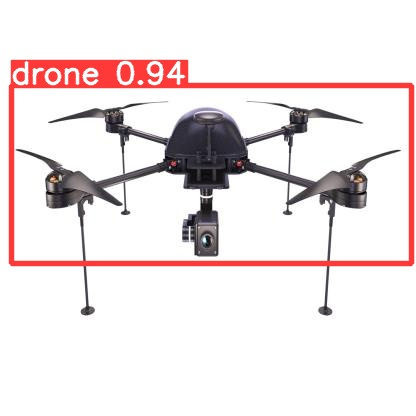

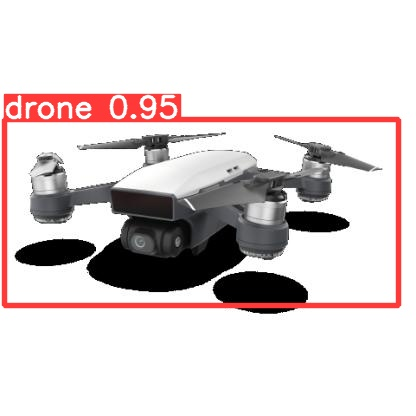

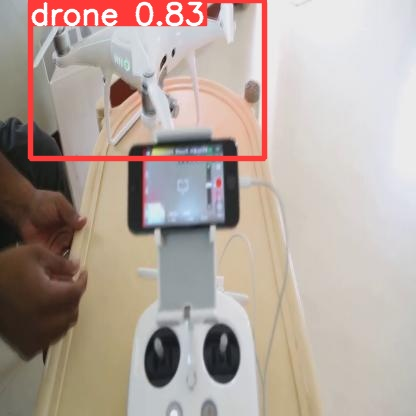

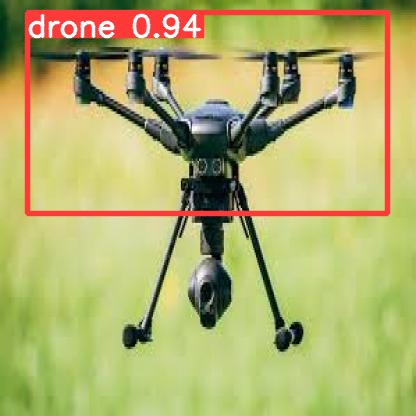

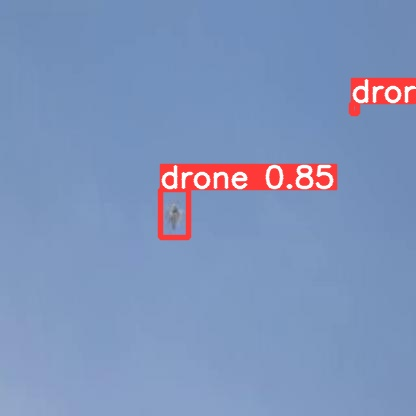

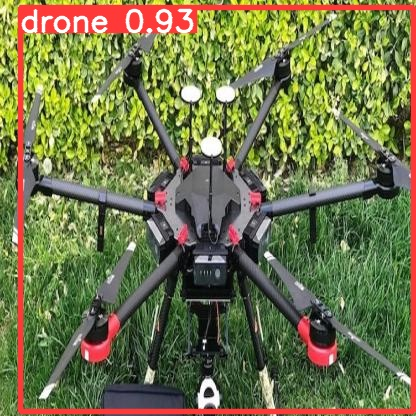

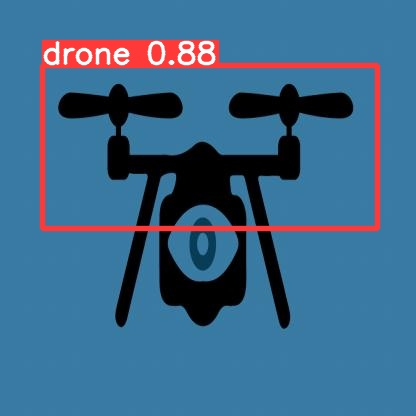

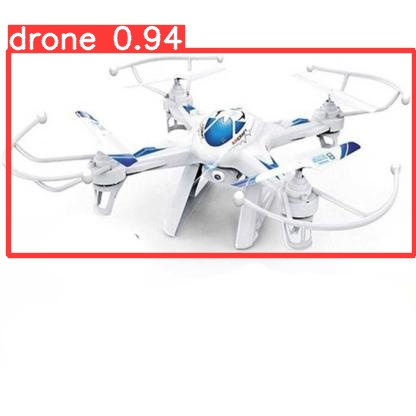

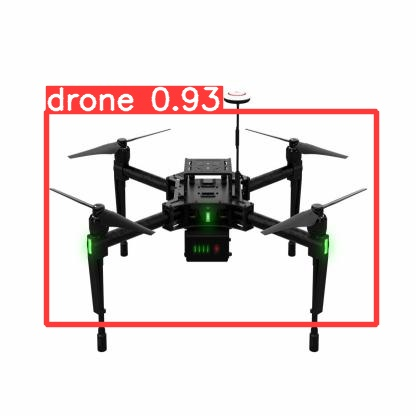

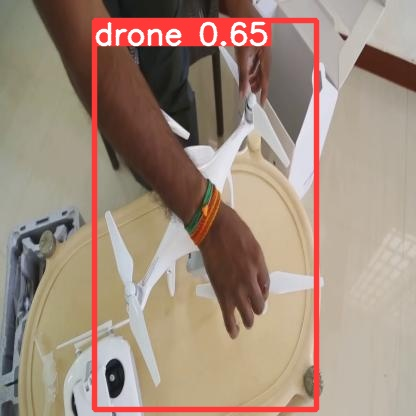

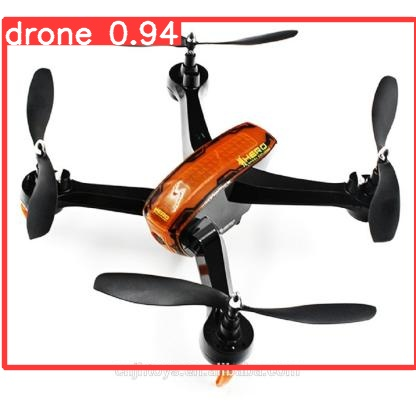

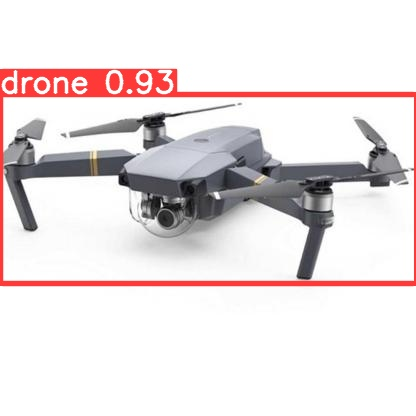

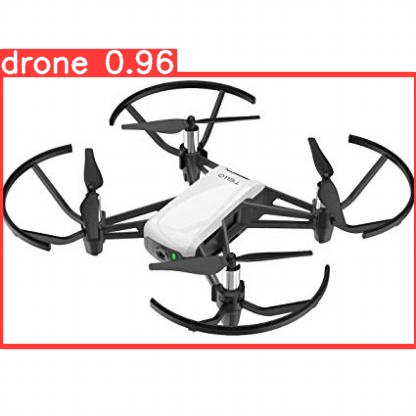

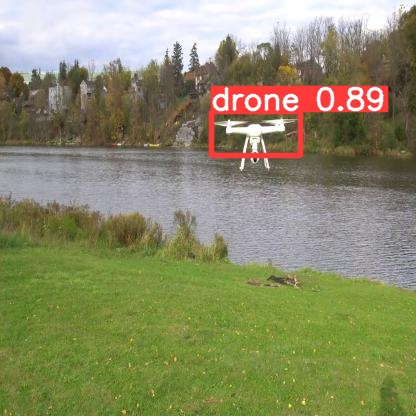

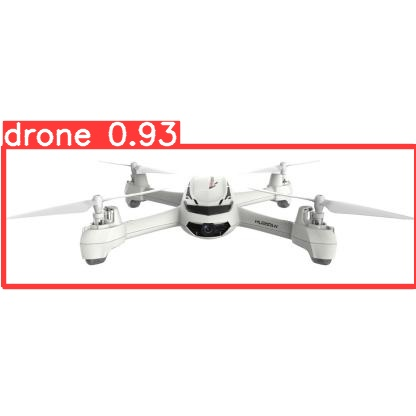

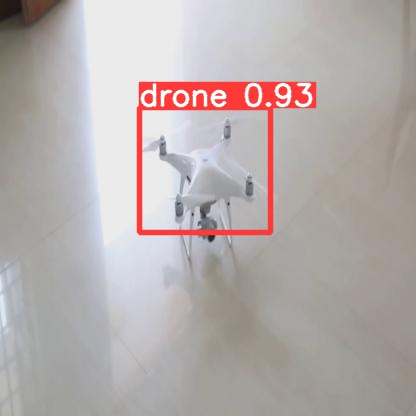

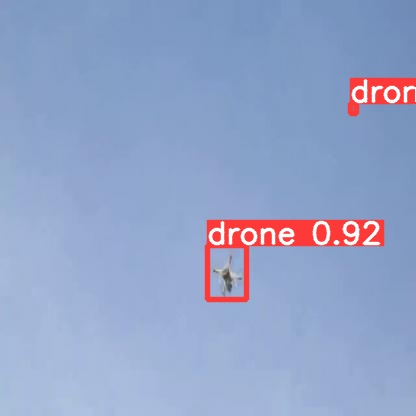

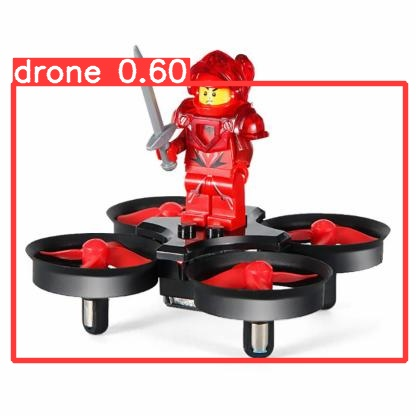

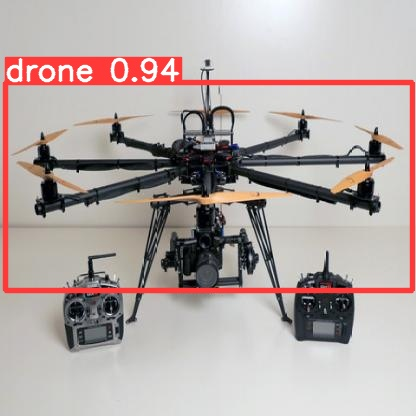

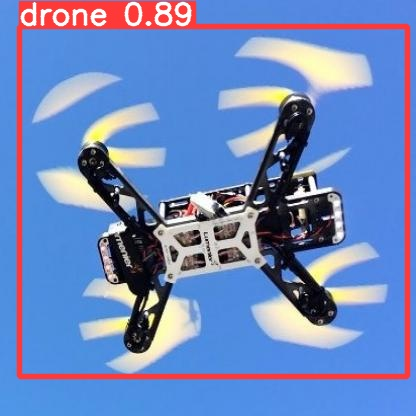

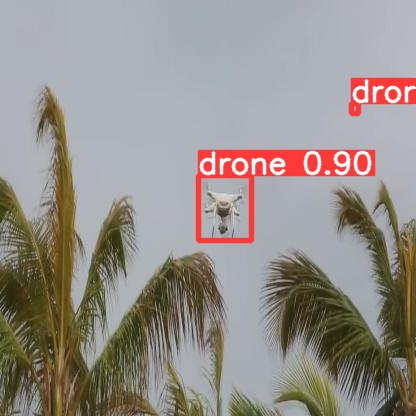

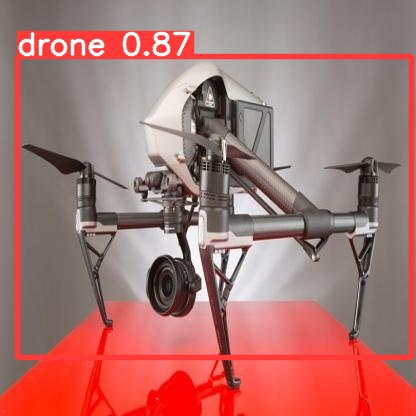

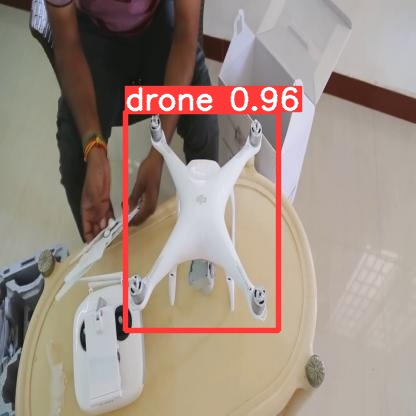

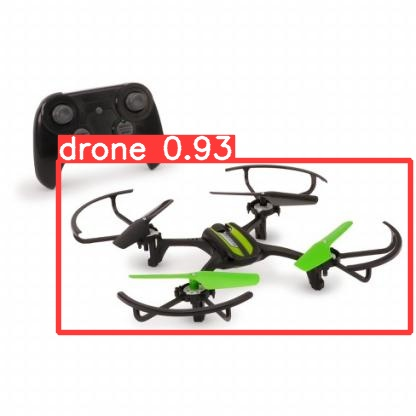

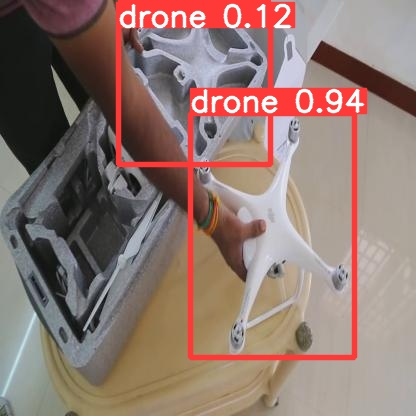

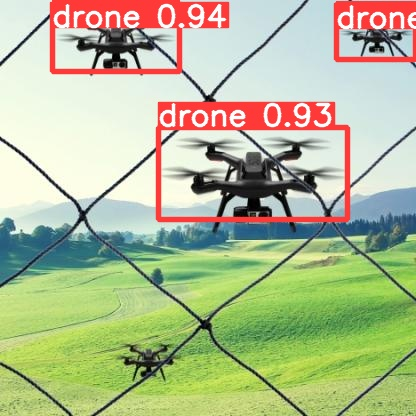

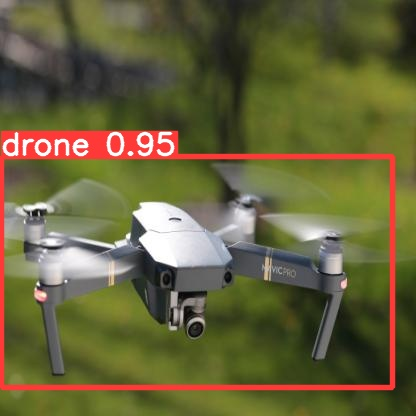

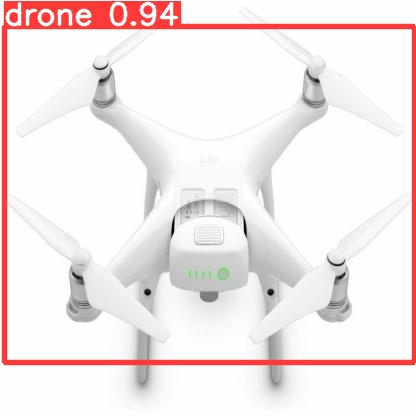

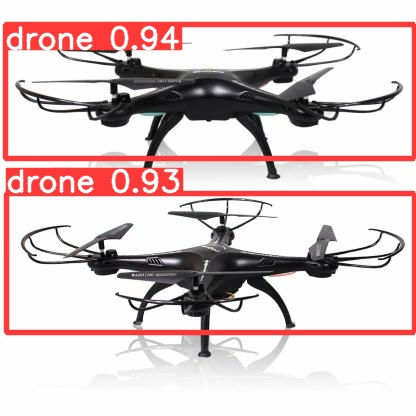

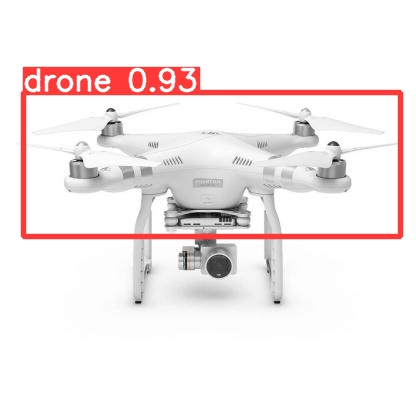

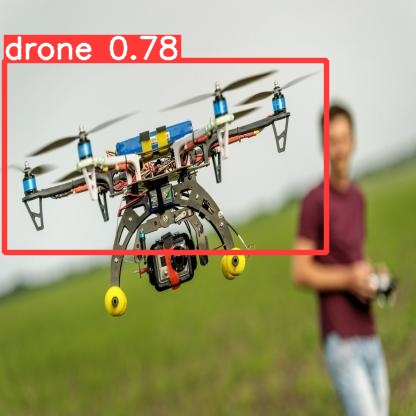

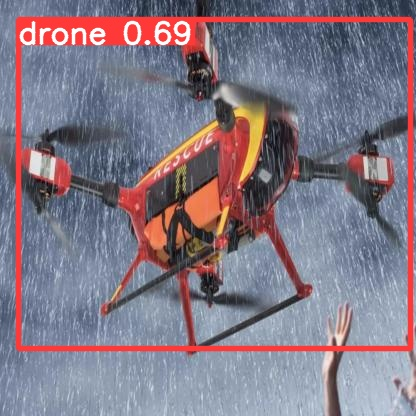

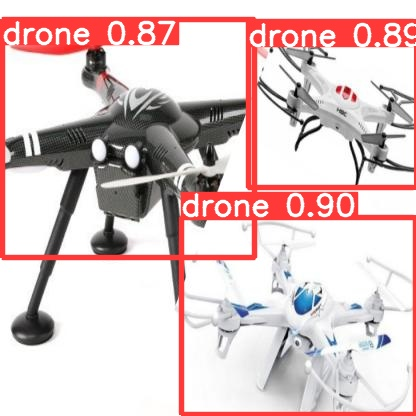

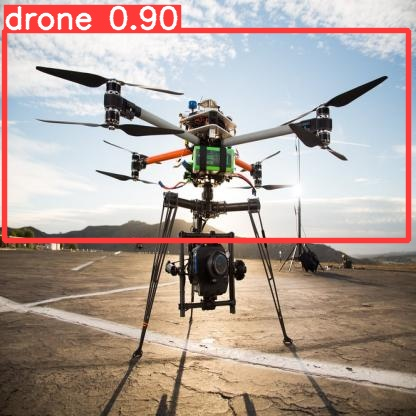

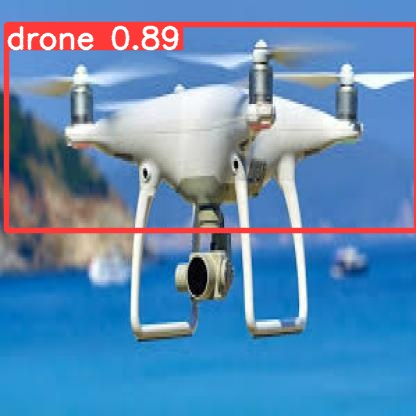

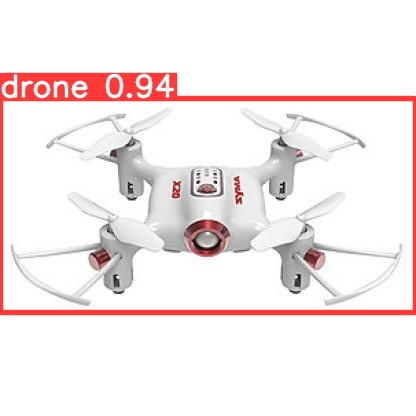

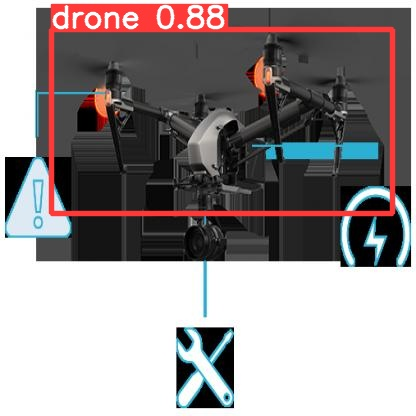

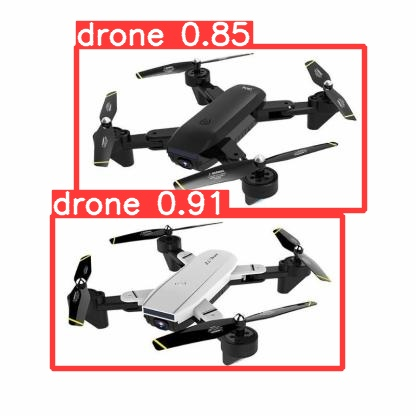

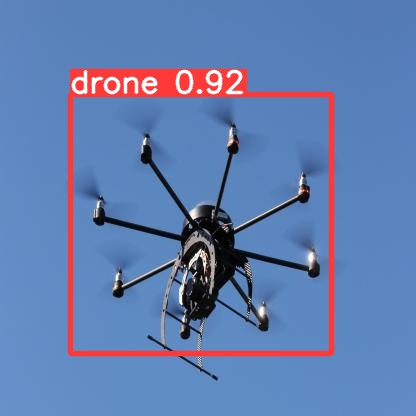

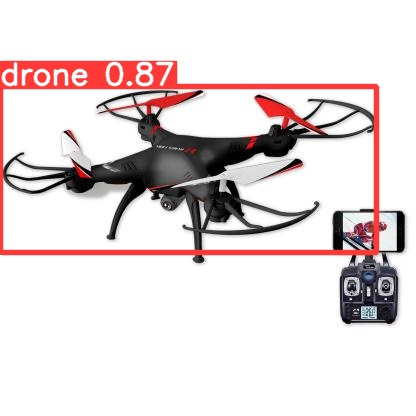

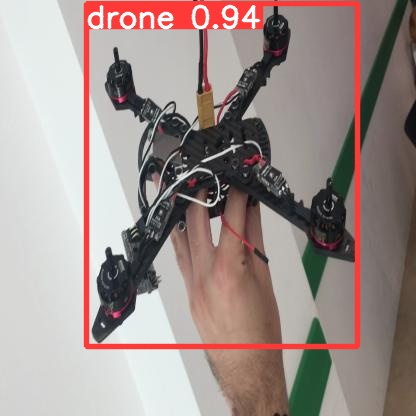

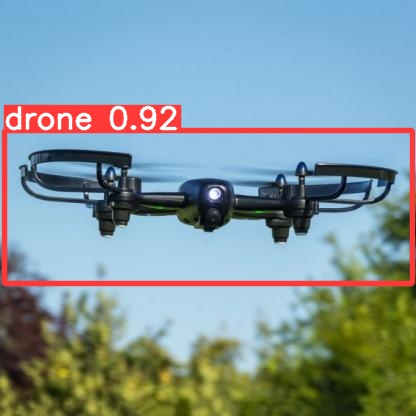

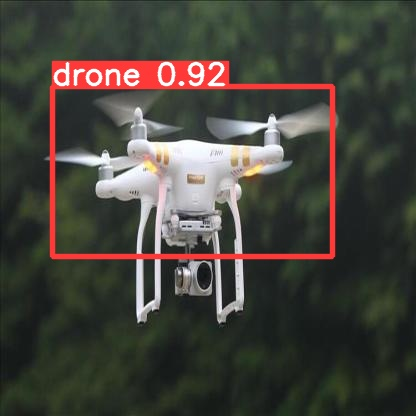

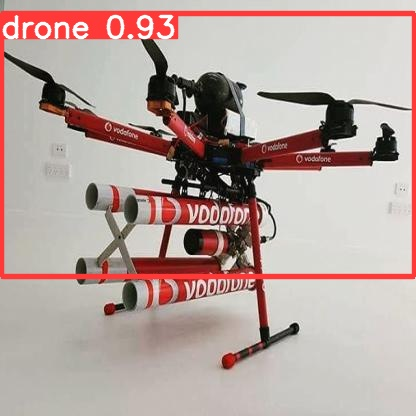

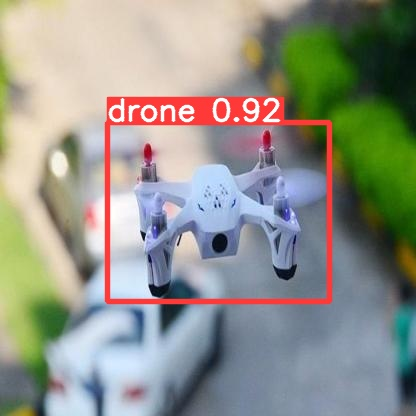

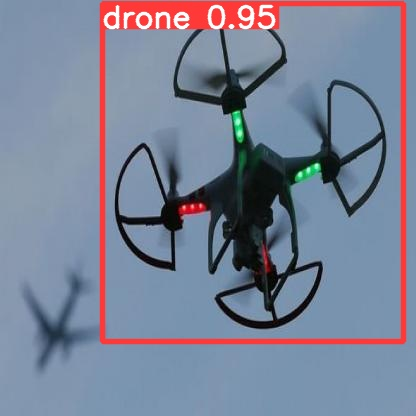

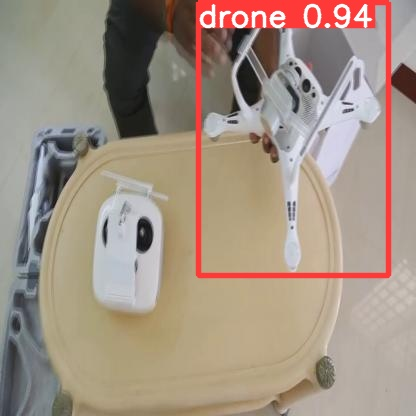

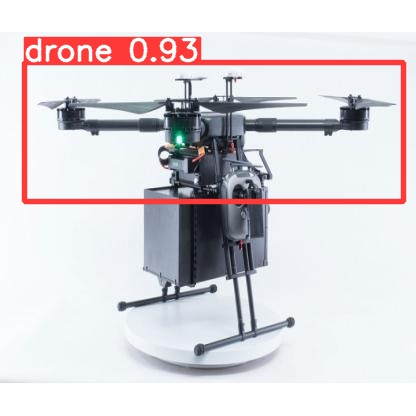

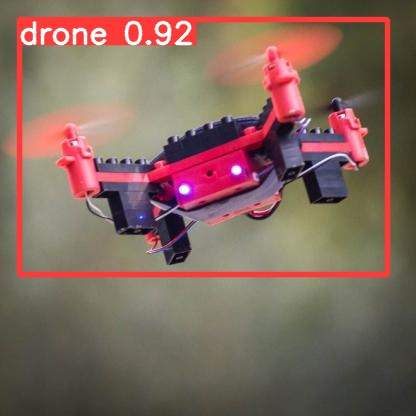

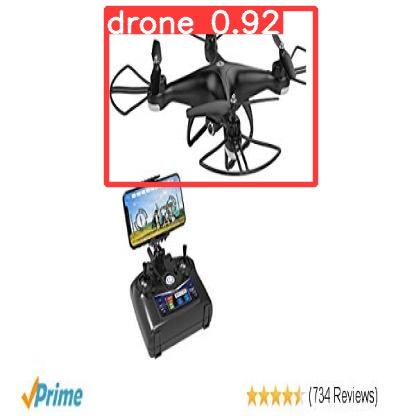

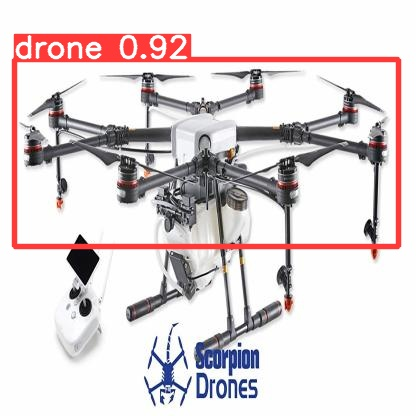

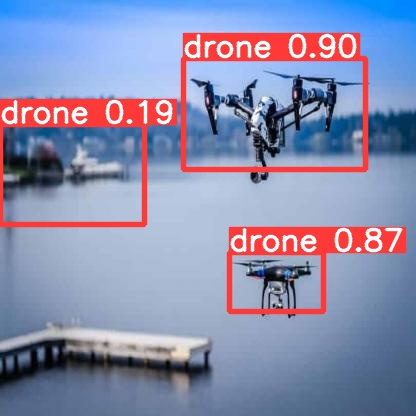

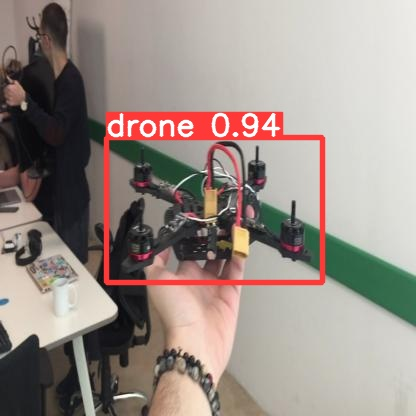

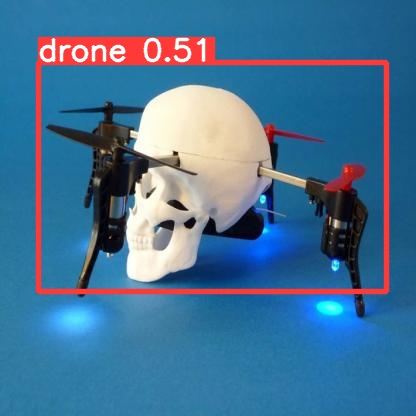

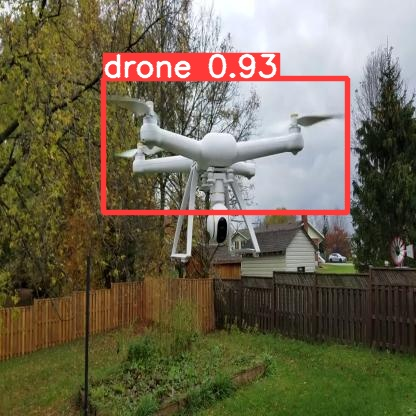

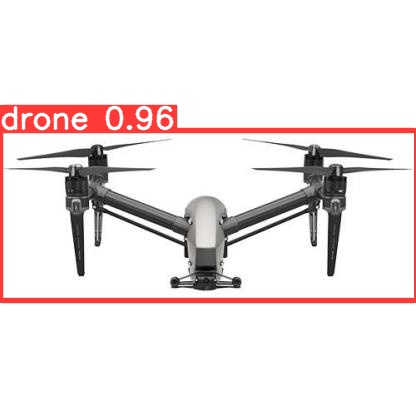

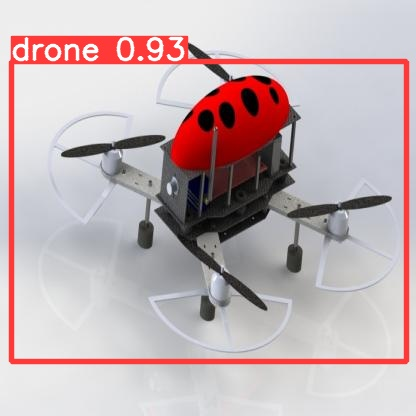

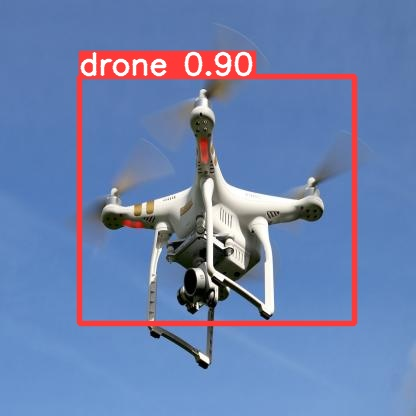

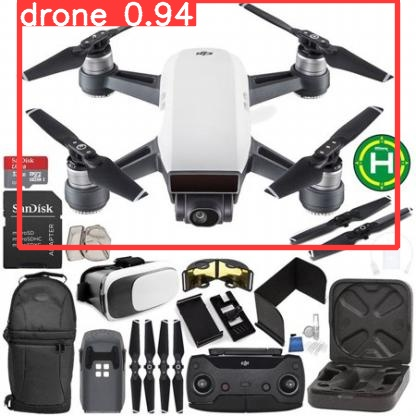

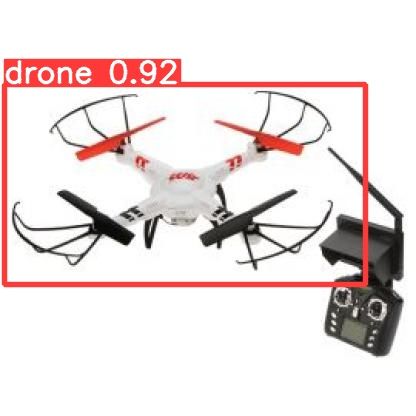

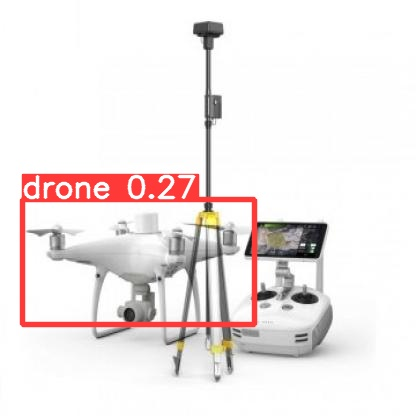

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### 5. Conclusion and Next Steps 

In [11]:
# export model's weights (학습된 모델 다운로드)
from google.colab import files
files.download('./runs/train/exp/weights/last.pt')
files.download('./runs/train/exp/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>